In [2]:
# Import necessary libraries
from main import *
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show


In [3]:
# Data Management
# processing path must include sentinel bands information vs mask data
processing_path = r"./data"
from osgeo import gdal, osr

red_file = os.path.join(processing_path,r"MS0.tif")
red_file_geo = os.path.join(processing_path,r"MS0_geo.tif")

green_file = os.path.join(processing_path,r"MS1.tif")
green_file_geo = os.path.join(processing_path,r"MS1_geo.tif")

blue_file = os.path.join(processing_path,r"MS2.tif")
blue_file_geo = os.path.join(processing_path,r"MS2_geo.tif")



gcps = [
    gdal.GCP(7900.50, 8089.50, 0, -74.19709072076589, 4.734426848655474),
    gdal.GCP(0.5, 0.5, 0, -74.02697084715334, 4.61304372954045),
    gdal.GCP(0.5, 8089.50, 0, -74.05907145146381, 4.762439612126528),
    gdal.GCP(7900.50, 0.5, 0, -74.1655981167345, 4.586393494568041)
]

In [5]:
import os
gcps=' -gcp 7900.50 8089.50 -74.19709072076589 4.734426848655474 -gcp 0.5 0.5 -74.02697084715334 4.61304372954045 -gcp 0.5 8089.50 -74.05907145146381 4.762439612126528 -gcp 7900.50 0.5 -74.1655981167345 4.586393494568041 '

def transformation(fname, gcps, out_geo_tif): 
    os.system(f'gdal_translate -of GTiff {gcps} "{fname}" "/app/data/temp.tif"')
    os.system(f'gdalwarp -r bilinear -order 1 -co COMPRESS=None  -t_srs EPSG:4326 "/app/data/temp.tif" "{out_geo_tif}"')


In [7]:
transformation(red_file, gcps, red_file_geo)
transformation(green_file, gcps, green_file_geo)
transformation(blue_file, gcps, blue_file_geo)

In [17]:
with rasterio.open(red_file_geo) as red:
    with rasterio.open(green_file_geo) as green:
        with rasterio.open(blue_file_geo) as blue:
            
            # Read the data for each band as an array
            red_data = red.read(1)
            green_data = green.read(1)
            blue_data = blue.read(1)
            
            # Create a tuple of the three arrays to use as the RGB image
            rgb = (red_data, green_data, blue_data)
            
            # Display the RGB image
            show(rgb)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [14]:
rgb = (red_data, green_data, blue_data)


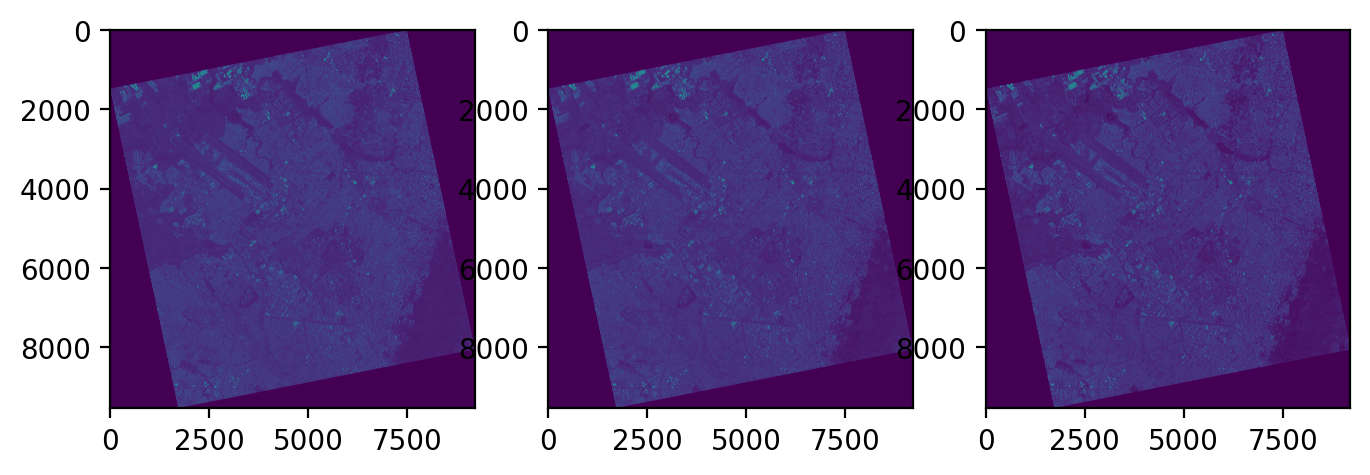

In [16]:
fig, axs = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.dpi'] = 200

axs[0].imshow(red_data)
axs[1].imshow(green_data)
axs[2].imshow(blue_data)


<BarContainer object of 4201 artists>

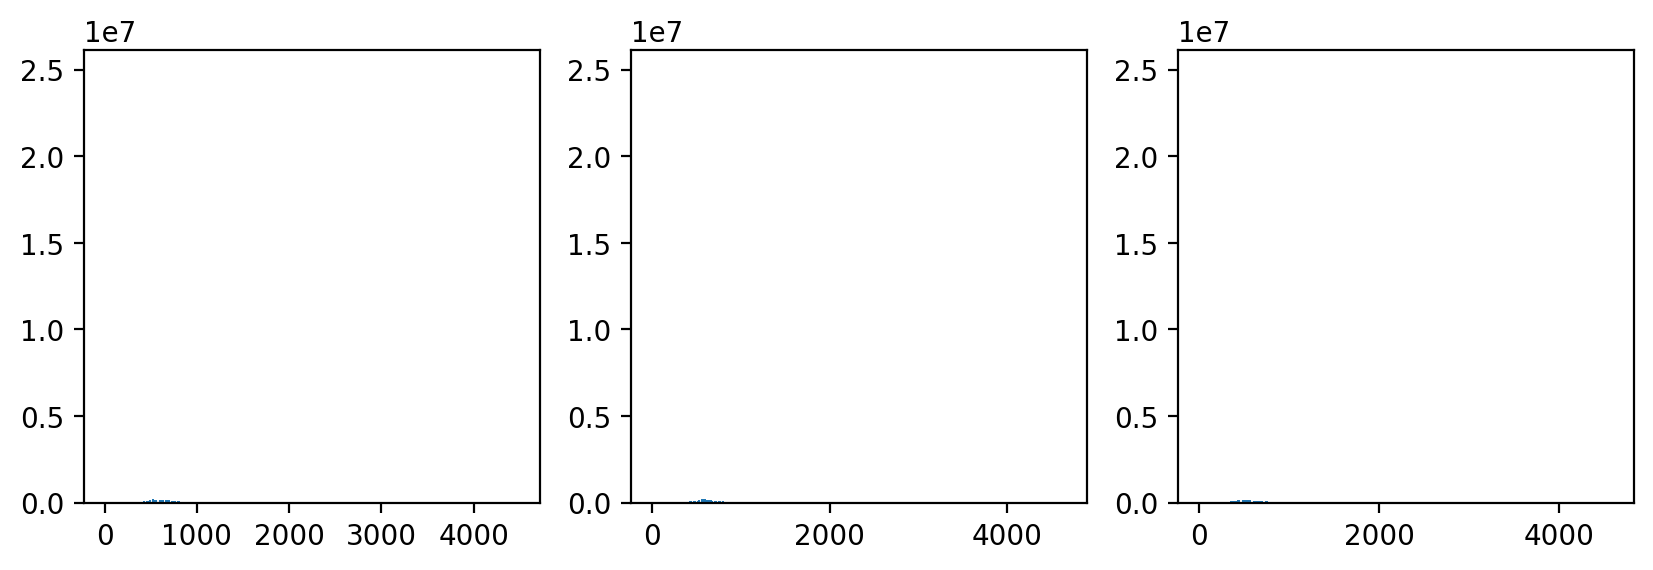

In [20]:
unique_r, frequency_r = np.unique(red_data, return_counts=True)
unique_g, frequency_g = np.unique(green_data, return_counts=True)
unique_b, frequency_b = np.unique(blue_data, return_counts=True)


fig2, axs2 = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = [2, 3]

axs2[0].bar(unique_r, frequency_r)
axs2[1].bar(unique_g, frequency_g)
axs2[2].bar(unique_b, frequency_b)

In [44]:
#Apply mask to the bands
bands_dataset = read_raster_data_xr(file_bands)
masked_bands = bands_dataset.where(filter_values.values, 0)
masked_bands

<xarray.DataArray (band: 10, y: 2057, x: 2177)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10
  * x            (x) float64 6.592e+05 6.592e+05 6.592e+05 ... 6.81e+05 6.81e+05
  * y            (y) float64 5.896e+06 5.896e+06 ... 5.875e+06 5.875e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('blue', 'green', 'red', 're1', 're2', 're3', 'nir', 're4'...

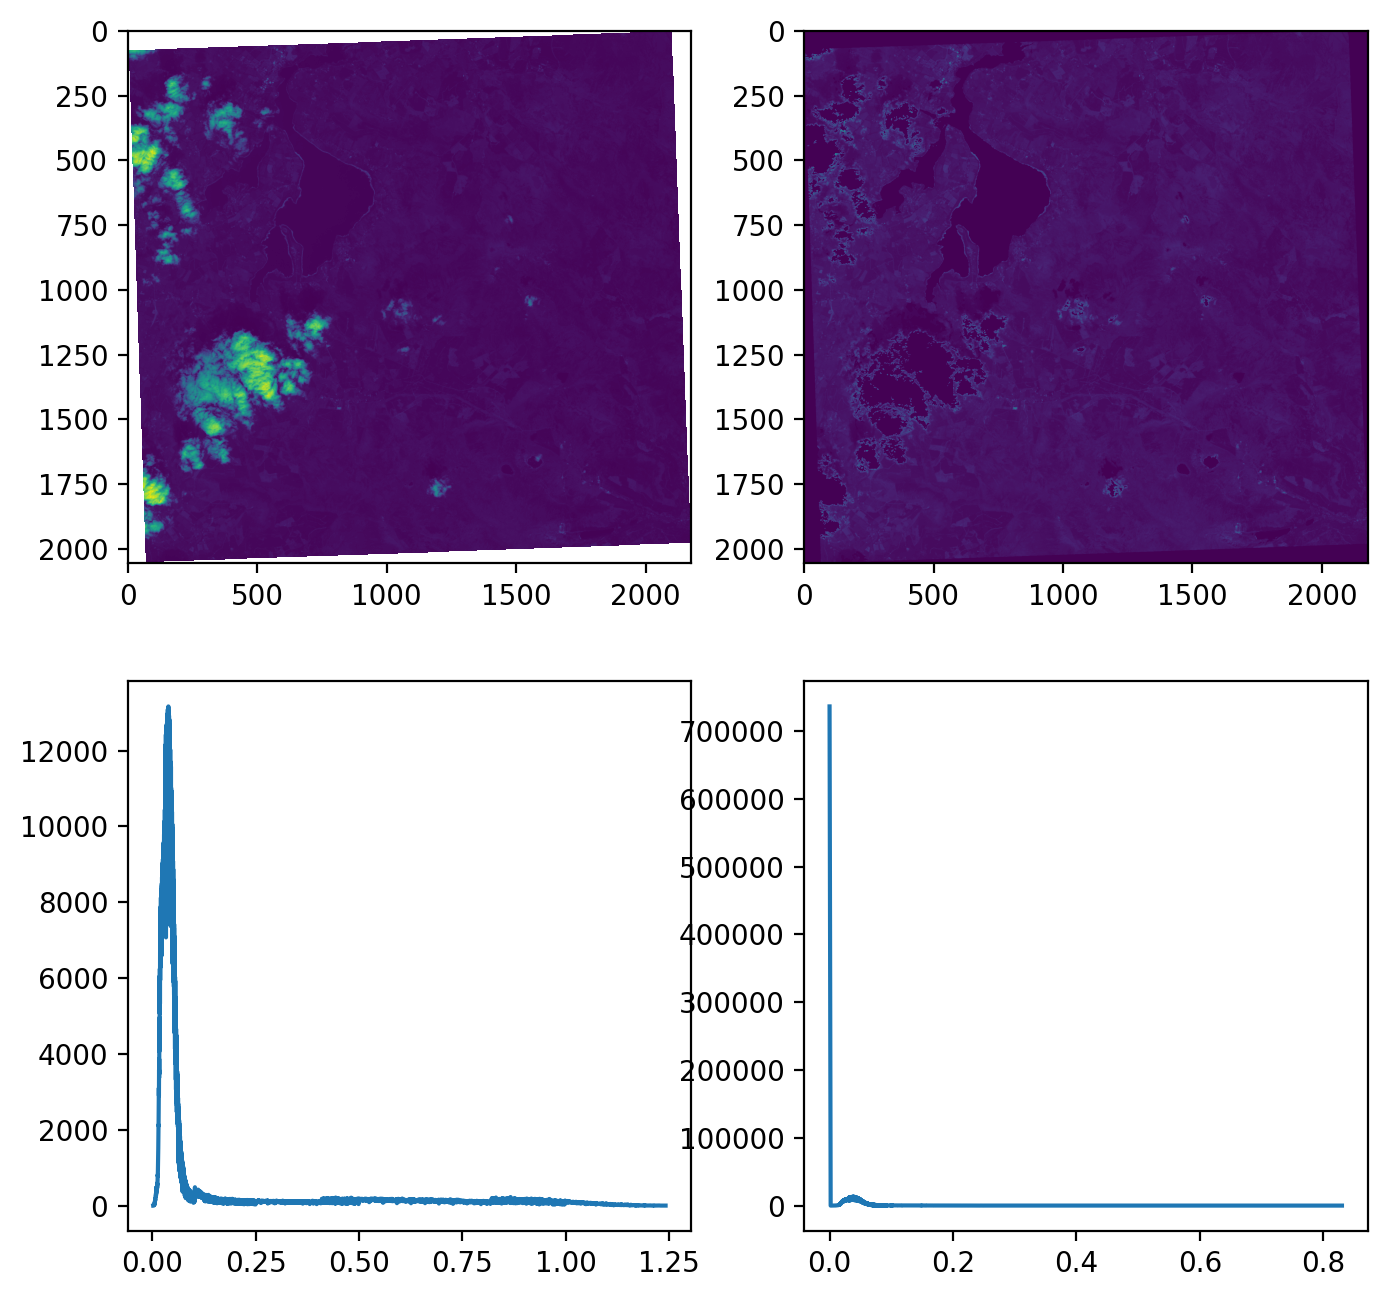

In [60]:
# Display the results
fig_3, axs_3 = plt.subplots(2, 2)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

# Compare result for the first band
unique, frequency = np.unique(bands_dataset[0], return_counts=True)
unique_filtered, frequency_filtered = np.unique(masked_bands[0], return_counts=True)

axs_3[0, 0].imshow(bands_dataset[0])
axs_3[0, 1].imshow(masked_bands[0])
axs_3[1, 0].plot(unique, frequency)
axs_3[1, 1].plot(unique_filtered, frequency_filtered)
# Graphs compare visually the change in the masking process.

In [62]:
# Export to geotiff

masked_bands.rio.to_raster(os.path.join(processing_path, f'jupyter_output_{date_tag}.tif'))